<h1>Содержание<span class="tocSkip"></span></h1>

</span></li></ul></div>

## Описание работы

    В данном исследовании нам нужно изучить данные об активности пользователей сотовой связи, состоящей из звонков, смс, интернет трафика. Данные предоставленны за период в один год из разных городов. Выборка по 500 пользователям. Все клиенты пользуются двумя тарифами, имеющими разные количества включенных в тариф звонков, смс и интернет трафика и месячной оплатой.

    В результате исследования нам нужно выяснить, на каком тарифе пользователи тратят больше денег и различаются ли траты для пользователей из Москвы и других городов.
    
    Общий план работы:
    1. ознакомление с данными
    2. проверка данных на корректность и осмысленность
    3. анализ распределения данных, анализ вероятностей 

## Импорты библиотек и файлов

In [1]:
import pandas as pd
#from pymystem3 import Mystem
#from nltk.stem import SnowballStemmer 
#from pandas.api.types import CategoricalDtype
#from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy import stats as st
from math import factorial
import math
import datetime
import calendar


dfCalls=pd.read_csv('/datasets/calls.csv')
dfInter=pd.read_csv('/datasets/internet.csv')
dfMess=pd.read_csv('/datasets/messages.csv')
dfTarif=pd.read_csv('/datasets/tariffs.csv')
dfUser=pd.read_csv('/datasets/users.csv')


### Анализ и чистка Calls

In [2]:
dfCalls.info()
display(dfCalls.sample(10))
print('Дубликатов {}'.format(dfCalls.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
53189,1134_250,2018-04-01,0.00,1134
117094,1300_490,2018-09-02,0.00,1300
49298,1123_317,2018-12-23,0.00,1123
190516,1469_135,2018-11-27,11.26,1469
187896,1464_416,2018-03-20,0.00,1464
152549,1380_184,2018-08-15,5.18,1380
76073,1189_741,2018-11-01,4.63,1189
128453,1330_317,2018-08-25,10.41,1330
134593,1344_410,2018-10-15,0.00,1344
195256,1479_59,2018-10-15,10.64,1479


Дубликатов 0


<span style='color:blue '> 
    Дубликатов нет, пустых значений нет, типы данных устраивают, кроме call_date, заменю на datetime
    </span>


count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64


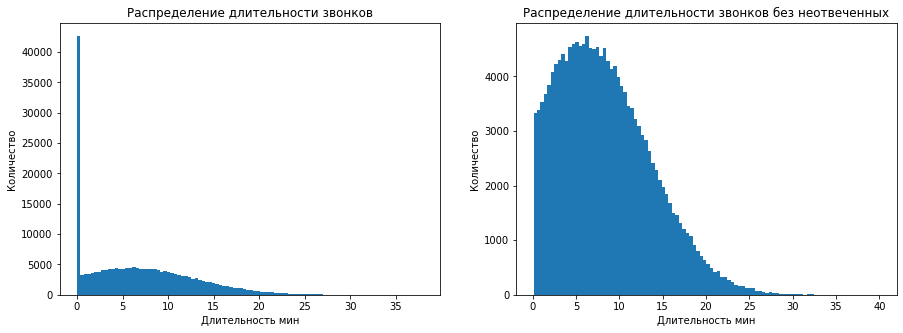

Количество звонков с длительностью более 25 мин :678


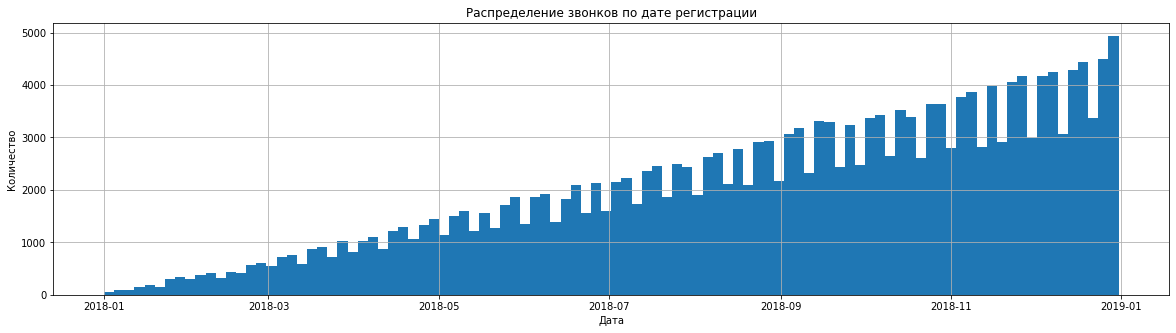

In [3]:
dfCalls.call_date=pd.to_datetime(dfCalls.call_date)
print(dfCalls.duration.describe())

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.hist(dfCalls.duration,bins=100)
ax1.set_title('Распределение длительности звонков')
ax1.set_xlabel('Длительность мин')
ax1.set_ylabel('Количество')
ax2.hist(dfCalls.duration,bins=100,range=(0.1,40))
ax2.set_title('Распределение длительности звонков без неотвеченных')
ax2.set_xlabel('Длительность мин')
ax2.set_ylabel('Количество')
plt.show()

print('Количество звонков с длительностью более 25 мин :{}'.format(dfCalls[dfCalls.duration>25]['duration'].count()))

dfCalls.call_date.hist(bins=100,figsize=(20,5))
plt.title('Распределение звонков по дате регистрации')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

<span style='color:blue '> 
    Пик при 0 - неотвеченные звонки, в остальном нормальное распределение.
    678 звонков с длительностью более 25 минут образуют хвост вправо, удалять не буду.
    Количество звонков с течением времени нарастает, видимо растет клиентская база. 
    Данные представленны за 1 год.
     </span>

### Анализ и чистка Internet

In [4]:
dfInter.info()
display(dfInter.sample(10))
print('Дубликатов {}'.format(dfInter.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
20117,20117,1067_218,442.41,2018-10-16,1067
72718,72718,1245_83,24.70,2018-12-15,1245
87375,87375,1296_10,614.00,2018-12-22,1296
58025,58025,1196_23,326.03,2018-07-15,1196
3658,3658,1011_525,166.87,2018-05-24,1011
138105,138105,1464_329,0.00,2018-09-12,1464
15491,15491,1054_471,462.98,2018-09-10,1054
1208,1208,1005_128,394.35,2018-04-17,1005
57698,57698,1193_237,212.63,2018-03-01,1193
75694,75694,1254_238,587.21,2018-04-22,1254


Дубликатов 0


<span style='color:blue '> Дубликатов нет, пустых значений нет, типы данных устраивают, кроме session_date, заменю на datetime
    </span>


count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64


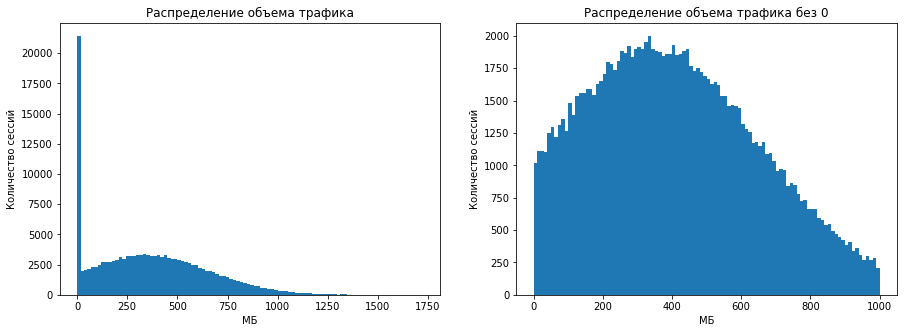

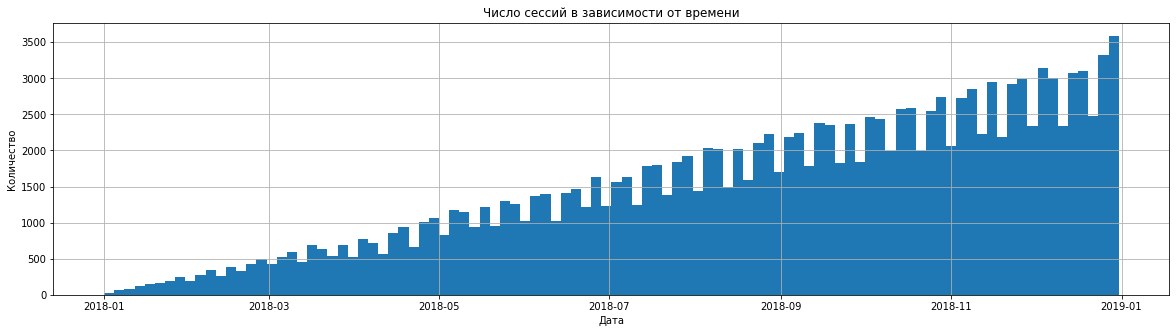

In [5]:
dfInter.session_date=pd.to_datetime(dfInter.session_date)

print(dfInter.mb_used.describe())

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.hist(dfInter.mb_used,bins=100)
ax1.set_title('Распределение объема трафика')
ax1.set_xlabel('МБ')
ax1.set_ylabel('Количество сессий')
ax2.hist(dfInter.mb_used,bins=100,range=(0.1,1000))
ax2.set_title('Распределение объема трафика без 0')
ax2.set_xlabel('МБ')
ax2.set_ylabel('Количество сессий')
plt.show()

dfInter.session_date.hist(bins=100,figsize=(20,5))
plt.title('Число сессий в зависимости от времени')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

<span style='color:blue '> 
    Куча нулевых сессий, не вижу причины убирать. В остальном довольно нормальное распределение. Хвост справа тоже трогать не буду.    
    Количество абонентов со временем растет.
    Данные представленны за 1 год.
     </span>

### Анализ и чистка messag

In [6]:
dfMess.info()
display(dfMess.sample(10))
print('Дубликатов {}'.format(dfMess.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
99579,1407_83,2018-08-21,1407
112445,1453_470,2018-12-26,1453
1065,1004_119,2018-09-25,1004
11582,1048_228,2018-10-27,1048
102656,1418_74,2018-10-31,1418
100763,1412_65,2018-12-17,1412
37677,1165_31,2018-10-31,1165
111721,1452_110,2018-08-31,1452
62236,1273_94,2018-12-16,1273
76459,1324_142,2018-09-10,1324


Дубликатов 0


<span style='color:blue '> Дубликатов нет, пустых значений нет, типы данных устраивают, кроме message_date, заменю на datetime
    </span>

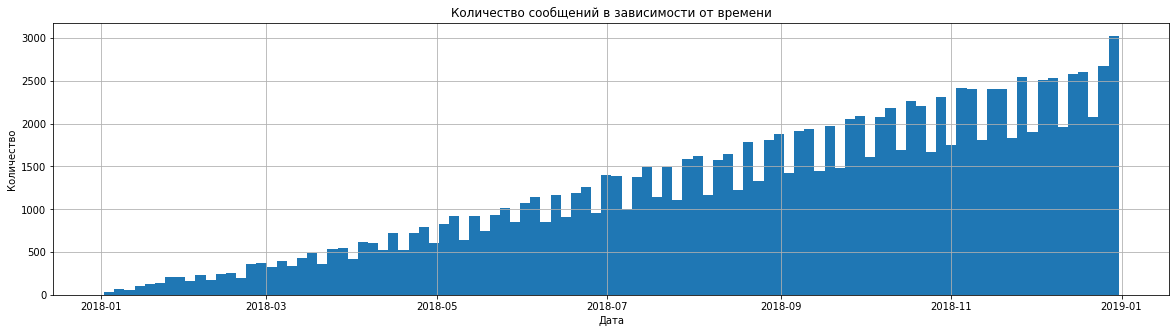

In [7]:
dfMess.message_date=pd.to_datetime(dfMess.message_date)

dfMess.message_date.hist(bins=100,figsize=(20,5))
plt.title('Количество сообщений в зависимости от времени')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

<span style='color:blue '> 
    И тут количество сообщений растет по мере расширения клиентской базы. Данные представленны за 1 год.
     </span>

### Анализ и чистка Tariff

In [8]:
dfTarif.info()
display(dfTarif)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<span style='color:blue '> Две строки с описанем тарифов, все понятно, ничего делать не надо
    </span>

### Анализ и чистка User

In [9]:
dfUser.info()
display(dfUser.sample(10))
print('Дубликатов {}'.format(dfUser.duplicated().sum()))
print('Уникальных пользователей : {}'.format(len(dfUser['user_id'].unique())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
230,1230,44,NaN,Томск,Ренальд,Капустин,2018-09-15,smart
235,1235,26,NaN,Москва,Агафья,Басова,2018-10-06,smart
108,1108,70,NaN,Москва,Рафаил,Болдырев,2018-11-01,smart
314,1314,27,NaN,Киров,Максим,Амелишко,2018-03-04,smart
441,1441,62,NaN,Самара,Леонтий,Белозёров,2018-11-07,smart
423,1423,50,NaN,Астрахань,Леон,Силин,2018-01-23,smart
170,1170,69,NaN,Новосибирск,Вадим,Козлов,2018-12-20,smart
149,1149,23,NaN,Мурманск,Алиса,Алексеенко,2018-05-19,smart
251,1251,48,NaN,Пермь,Роксана,Тетерина,2018-02-13,smart
144,1144,65,NaN,Улан-Удэ,Ефим,Ефремов,2018-04-29,smart


Дубликатов 0
Уникальных пользователей : 500


<span style='color:blue '> Дубликатов нет, пустыe значения есть, но трогать их не надо, т.к. это означает, что данным тарифом пользуются на данный момент, типы данных устраивают, кроме reg_date и churn_date, заменю на datetime
    </span>

In [10]:
dfUser.reg_date=pd.to_datetime(dfUser.reg_date)
dfUser.churn_date=pd.to_datetime(dfUser.churn_date)
print('Количество городов в данных {}'.format(len(dfUser.city.unique())))
print('Количество пользователей в данных {}'.format(len(dfUser.user_id.unique())))
print('Количество тарифов в данных {}'.format(len(dfUser.tariff.unique())))

Количество городов в данных 76
Количество пользователей в данных 500
Количество тарифов в данных 2


<span style='color:blue '> 
    76 городов, 500 уникальных пользователей, 38 расторгнутых договоров, 2 тарифа - все верно, замечаний к данным нет.
     </span>

## Подсчеты

### Вычисляем сколько денег тратят пользователи на все помесячно

In [11]:
#     выделяем из даты месяц для последующей группировки
dfCalls['call_month']=dfCalls.call_date.dt.month
dfInter['call_month']=dfInter.session_date.dt.month
dfMess['call_month']=dfMess.message_date.dt.month

#     округляем дробные значения продолжительности разговоров до целого вверх
dfCalls['round_time']=dfCalls['duration'].apply(math.ceil)

#     добавим в таблицу пользователей данные по тарифам. 
dfUser=dfUser.merge(dfTarif,left_on='tariff',right_on='tariff_name',how='inner')

#     подсчитываем количество минут, звонков, смс и интернет трафика в разрезе пользователей по месяцам
df_user_minut=dfCalls.pivot_table(index=['user_id'],columns='call_month',values='round_time',aggfunc='sum')
df_user_count=dfCalls.pivot_table(index=['user_id'],columns='call_month',values='duration',aggfunc='count')
df_user_mess=dfMess.pivot_table(index=['user_id'],columns='call_month',values='id',aggfunc='count')
df_user_inter=dfInter.pivot_table(index=['user_id'],columns='call_month',values='mb_used',aggfunc='sum')

#     добавляем в таблицы значения включенных в тариф минут, смс и трафика, и цены за превышение, это мне нужно что-бы вычислить стоимость     
df_user_minut=df_user_minut.merge(dfUser.loc[:,['user_id','minutes_included','rub_per_minute']],left_on='user_id',right_on='user_id',how='inner')
df_user_mess= df_user_mess.merge(dfUser.loc[:,['user_id','messages_included','rub_per_message']],left_on='user_id',right_on='user_id',how='inner')
df_user_inter= df_user_inter.merge(dfUser.loc[:,['user_id','mb_per_month_included','rub_per_gb']],left_on='user_id',right_on='user_id',how='inner')

#     переименовываем столбцы для единообразия
df_user_minut=df_user_minut.rename(columns={'minutes_included':'norma','rub_per_minute':'price'})
df_user_mess=df_user_mess.rename(columns={'messages_included':'norma','rub_per_message':'price'})
df_user_inter=df_user_inter.rename(columns={'mb_per_month_included':'norma','rub_per_gb':'price'})

#      заменяем NaN на 0
df_user_minut.fillna(0,axis=1,inplace=True)
df_user_mess.fillna(0,axis=1,inplace=True)
df_user_inter.fillna(0,axis=1,inplace=True)


In [12]:
#    В этом блоке мы создаем датафрейм, ктороый содержит абонентскую плату для каждого пользователя помесячно,
#    с учетом даты начала и конца договора

#    выделяем из даты начала и конца договора месяц
dfUser['start_mon']=dfUser.reg_date.dt.month
dfUser['end_mon']=dfUser[dfUser.churn_date.notnull()]['churn_date'].dt.month

#    создаем датафрейм, содержащий всех пользователей
df_monfee=dfUser.loc[:,['user_id','start_mon','end_mon','rub_monthly_fee']]
df_monfee=df_monfee.set_index('user_id')
df_monfee=df_monfee.sort_index(ascending=True)

#    добавляем столбцы для месяцев
for i in range(1,13):
    df_monfee[i]=0.0

#    процедура получает строку, и расставляет по месяцам сумму абонентской платы с учетом начала и конца договора
def ins_monfee(row):
    sta=row.start_mon             # месяц начала
#    sto=12                        # 
    val=row.rub_monthly_fee       #
    if np.isnan(row.end_mon):     # месяц конца если есть, иначе - 12
        sto=12
    else:
        sto=row.end_mon
    for i in range(1,13):
        m=i
        if  (m>=sta) and (m<=sto):
            row[i]=val
        else:
            row[i]=0
    return(row)

#    применяем расчет
df_monfee=df_monfee.apply(ins_monfee,axis=1)

#   удаляем ненужные столбцы
df_monfee=df_monfee.drop(['start_mon','end_mon','rub_monthly_fee'],axis=1)

In [13]:
#     процедура, которая вычитает из реальных данных включенные в тариф бесплатные и умножает остаток на цену
#     таким образом мы будем иметь в ячейках стоимость превышения

def calc_exclud(row):
    norma=row.norma
    price=row.price
    for i in range(1,13):
        x=row[i]-norma
        if x<0:
            row[i]=0
        else:
            row[i]=x*price
    return(row)


#    вычисляем для интернета подлежащий оплате трафик
def calc_internet(row):
    norma=row.norma
    price=row.price
    for i in range(1,13):
        x=row[i]-norma
        if x<0:
            row[i]=0
        else:
            try:
                x=math.ceil(x/1024) # приводим значение месячного трафика к Гб с округлением вверх до целого
            except:
                x=0
            row[i]=x*price
    return(row)


#   применяем вышенаписанные процедуры
df_user_minut=df_user_minut.apply(calc_exclud,axis=1)
df_user_mess=df_user_mess.apply(calc_exclud,axis=1)
df_user_inter=df_user_inter.apply(calc_internet,axis=1)

In [14]:
#     делаем user_id индексом, что-бы потом все сложить
df_user_minut=df_user_minut.set_index('user_id')
df_user_mess=df_user_mess.set_index('user_id')
df_user_inter=df_user_inter.set_index('user_id')

#     удаляем ненужные столбцы
df_user_minut=df_user_minut.drop(['norma','price'],axis=1)
df_user_mess=df_user_mess.drop(['norma','price'],axis=1)
df_user_inter=df_user_inter.drop(['norma','price'],axis=1)

In [15]:
#     складываем все 4 датафрейма
#     df_user_minut - сколько заплатил каждый пользователь за минуты сверх включенных в тариф помесячно
#     df_user_mess  - сколько заплатил каждый пользователь за сообщения сверх включенных в тариф помесячно
#     df_user_inter - сколько заплатил каждый пользователь за интернет сверх включенных в тариф помесячно
#     df_monfee     - абонентская плата помесячно
df_user_profit=df_user_minut.add(df_user_mess,fill_value=0)
df_user_profit=df_user_profit.add(df_user_inter,fill_value=0)
df_user_profit=df_user_profit.add(df_monfee,fill_value=0)

#     в датафрейме df_user_profit у нас теперь расходы каждого пользователя по месяцам

### распределение вероятностей с разбивкой по месяцам

#### звонки
<span style='color:blue '> 
    Посмотрим как распределяются вероятности продолжительности звонков
     </span>

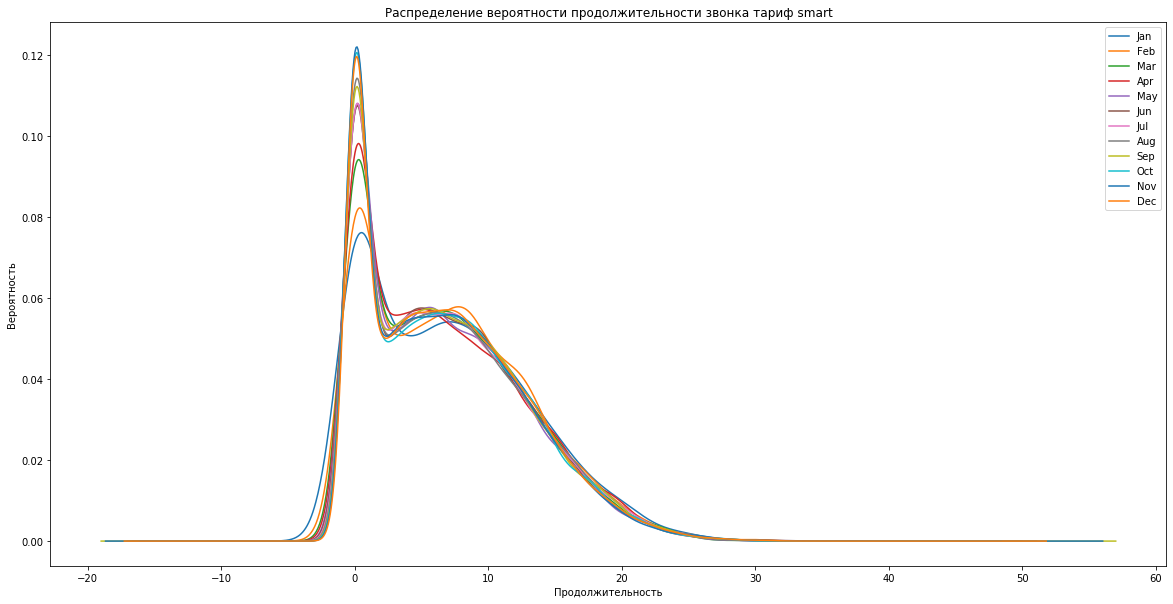

,sigma,sr,median,mon,disp
0,5.99,6.97,6.33,Jan,35.83
1,5.88,7.04,6.50,Feb,34.61
2,5.81,6.77,6.11,Mar,33.79
3,5.88,6.75,5.82,Apr,34.54
4,5.78,6.61,5.80,May,33.35
5,5.82,6.72,5.95,Jun,33.91
6,5.89,6.80,5.97,Jul,34.63
7,5.88,6.75,5.97,Aug,34.57
8,5.85,6.79,6.03,Sep,34.18
9,5.83,6.71,6.02,Oct,33.98


In [16]:
pd.options.display.float_format = '{:.2f}'.format
testdf=dfCalls.merge(dfUser.loc[:,['user_id','tariff','city']],left_on='user_id',right_on='user_id',how='inner')
df_call_smart=testdf[testdf.tariff=='smart']
df_call_ultra=testdf[testdf.tariff=='ultra']
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
df_disp=pd.DataFrame(columns={'mon','disp','sigma','sr','median'})
for i in range(1,13):
    df_call_smart[df_call_smart.call_month==i]['duration'].plot(kind='density',label=calendar.month_abbr[i])
    disp=np.var(df_call_smart[df_call_smart.call_month==i]['duration'],ddof=1)
    sigma=np.std(df_call_smart[df_call_smart.call_month==i]['duration'],ddof=1)
    sr= df_call_smart[df_call_smart.call_month==i]['duration'].mean()
    med= df_call_smart[df_call_smart.call_month==i]['duration'].median()
    df_disp=df_disp.append({'mon': calendar.month_abbr[i] , 'disp': disp ,'sigma': sigma,'sr':sr,'median':med},ignore_index=True)
plt.legend()
plt.title('Распределение вероятности продолжительности звонка тариф smart')
plt.xlabel('Продолжительность')
plt.ylabel('Вероятность')
plt.show()
display(df_disp)


<span style='color:blue '> 
    20.09.21
    Добавлен раздел 3.3, в котором выполненно вышеуказанное
     </span>

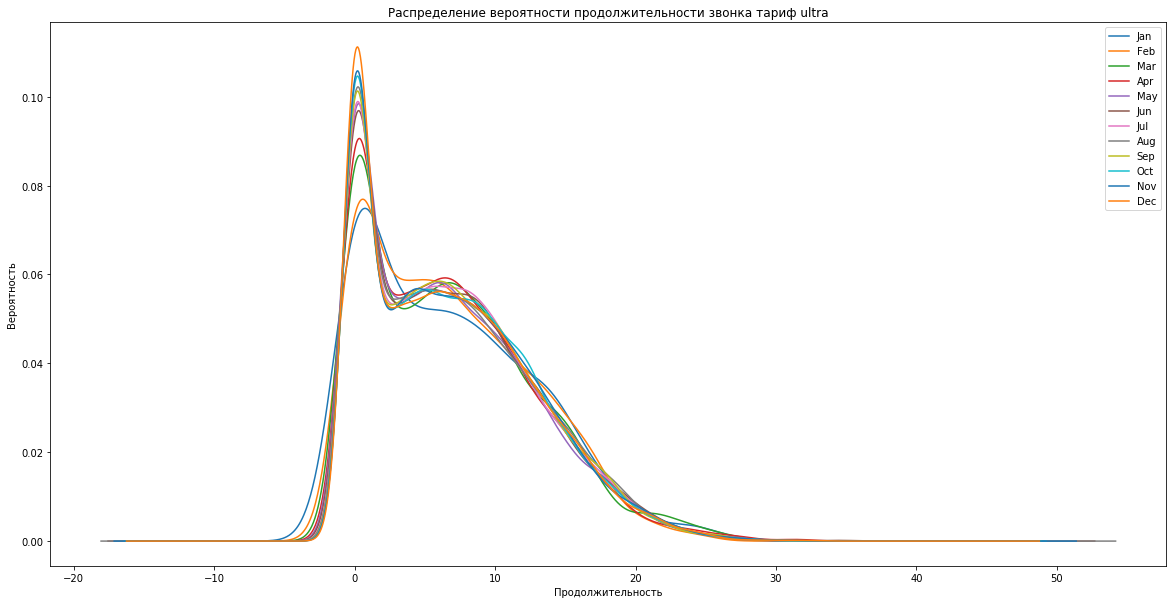

,sigma,sr,median,mon,disp
0,6.00,6.81,6.03,Jan,36.04
1,5.67,6.75,6.12,Feb,32.10
2,5.94,6.83,6.17,Mar,35.29
3,5.85,6.74,6.00,Apr,34.26
4,5.85,6.64,5.79,May,34.26
5,5.87,6.79,5.98,Jun,34.42
6,5.81,6.80,6.06,Jul,33.81
7,5.84,6.76,5.94,Aug,34.14
8,5.83,6.82,6.07,Sep,33.98
9,5.83,6.81,6.07,Oct,33.97


In [17]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
df_disp=pd.DataFrame(columns={'mon','disp','sigma','sr','median'})
for i in range(1,13):
    df_call_ultra[df_call_ultra.call_month==i]['duration'].plot(kind='density',label=calendar.month_abbr[i])
    disp=np.var(df_call_ultra[df_call_ultra.call_month==i]['duration'])
    sigma=np.std(df_call_ultra[df_call_ultra.call_month==i]['duration'])
    sr= df_call_ultra[df_call_ultra.call_month==i]['duration'].mean()
    med= df_call_ultra[df_call_ultra.call_month==i]['duration'].median()
    df_disp=df_disp.append({'mon': calendar.month_abbr[i] , 'disp': disp ,'sigma': sigma,'sr':sr,'median':med},ignore_index=True)
plt.legend()
plt.title('Распределение вероятности продолжительности звонка тариф ultra')
plt.xlabel('Продолжительность')
plt.ylabel('Вероятность')
plt.show()
display(df_disp)

<span style='color:blue '> 
    Неотвеченные звонки дают выброс около 0, уберем их и посмотрим еще раз
     </span>

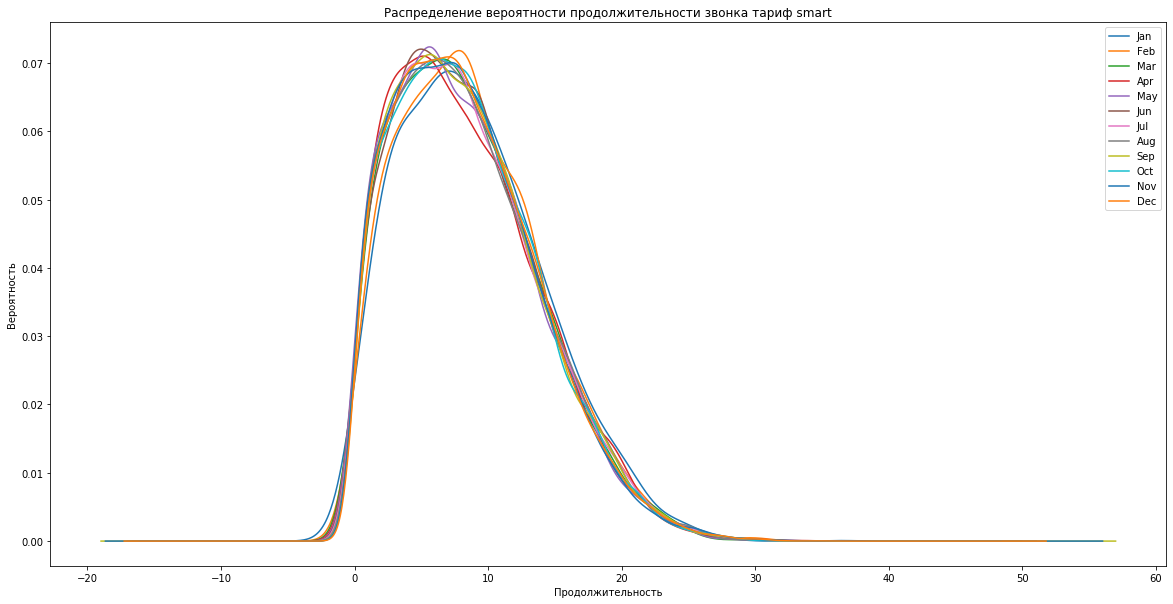

,sigma,sr,median,mon,disp
0,5.38,8.82,8.21,Jan,28.97
1,5.33,8.69,8.16,Feb,28.38
2,5.32,8.39,7.74,Mar,28.28
3,5.42,8.35,7.59,Apr,29.34
4,5.29,8.26,7.61,May,28.03
5,5.32,8.39,7.73,Jun,28.33
6,5.41,8.42,7.71,Jul,29.24
7,5.39,8.42,7.73,Aug,29.05
8,5.36,8.41,7.75,Sep,28.70
9,5.32,8.42,7.82,Oct,28.26


In [18]:
df_call_smart=df_call_smart[df_call_smart.duration>0]
df_call_ultra=df_call_ultra[df_call_ultra.duration>0]
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
df_disp=pd.DataFrame(columns={'mon','disp','sigma','sr','median'})
for i in range(1,13):
    df_call_smart[df_call_smart.call_month==i]['duration'].plot(kind='density',label=calendar.month_abbr[i])
    disp=np.var(df_call_smart[df_call_smart.call_month==i]['duration'])
    sr= df_call_smart[df_call_smart.call_month==i]['duration'].mean()
    med= df_call_smart[df_call_smart.call_month==i]['duration'].median()
    sigma=np.std(df_call_smart[df_call_smart.call_month==i]['duration'])
    df_disp=df_disp.append({'mon': calendar.month_abbr[i] , 'disp': disp ,'sigma': sigma,'sr':sr,'median':med},ignore_index=True)
ax.legend()
plt.title('Распределение вероятности продолжительности звонка тариф smart')
plt.xlabel('Продолжительность')
plt.ylabel('Вероятность')
plt.show()
display(df_disp)


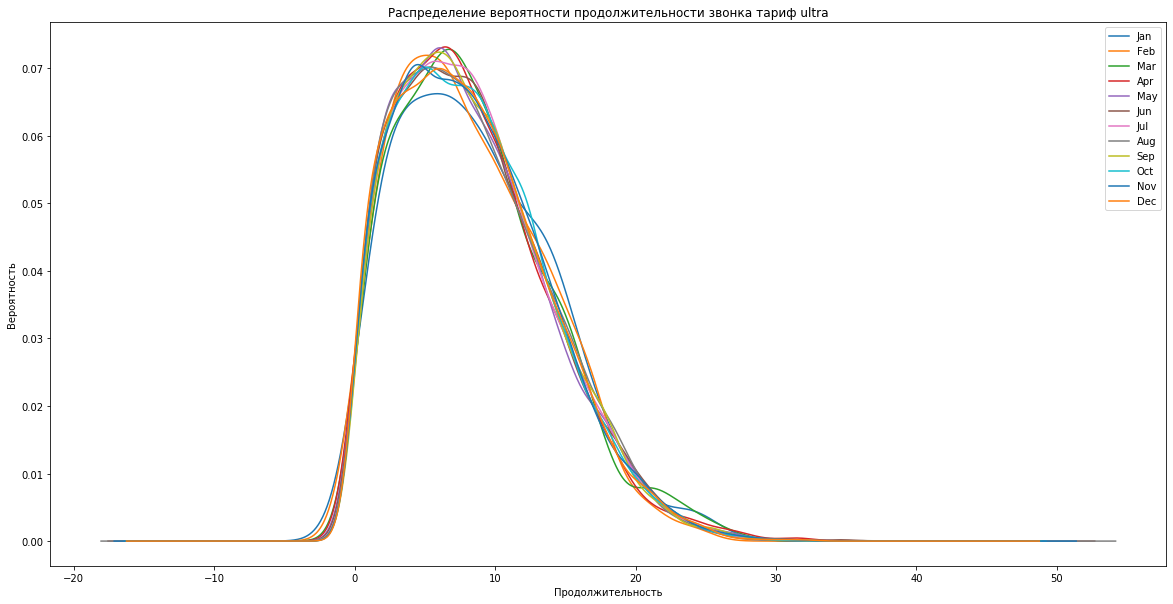

,sigma,sr,median,mon,disp
0,5.45,8.67,7.88,Jan,29.74
1,5.18,8.25,7.38,Feb,26.86
2,5.44,8.52,7.77,Mar,29.61
3,5.41,8.30,7.53,Apr,29.24
4,5.39,8.31,7.50,May,29.01
5,5.40,8.39,7.73,Jun,29.12
6,5.32,8.41,7.76,Jul,28.28
7,5.36,8.38,7.69,Aug,28.74
8,5.33,8.43,7.69,Sep,28.45
9,5.34,8.41,7.83,Oct,28.49


In [19]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
df_disp=pd.DataFrame(columns={'mon','disp','sigma','sr','median'})
for i in range(1,13):
    df_call_ultra[df_call_ultra.call_month==i]['duration'].plot(kind='density',label=calendar.month_abbr[i])
    disp=np.var(df_call_ultra[df_call_ultra.call_month==i]['duration'])
    sigma=np.std(df_call_ultra[df_call_ultra.call_month==i]['duration'])
    sr= df_call_ultra[df_call_ultra.call_month==i]['duration'].mean()
    med= df_call_ultra[df_call_ultra.call_month==i]['duration'].median()
    df_disp=df_disp.append({'mon': calendar.month_abbr[i] , 'disp': disp ,'sigma': sigma,'sr':sr,'median':med},ignore_index=True)
ax.legend()
plt.title('Распределение вероятности продолжительности звонка тариф ultra')
plt.xlabel('Продолжительность')
plt.ylabel('Вероятность')
plt.show()
display(df_disp)

#### смс

<span style='color:blue '> 
    Теперь посмотрим как распределенно количество смс
     </span>

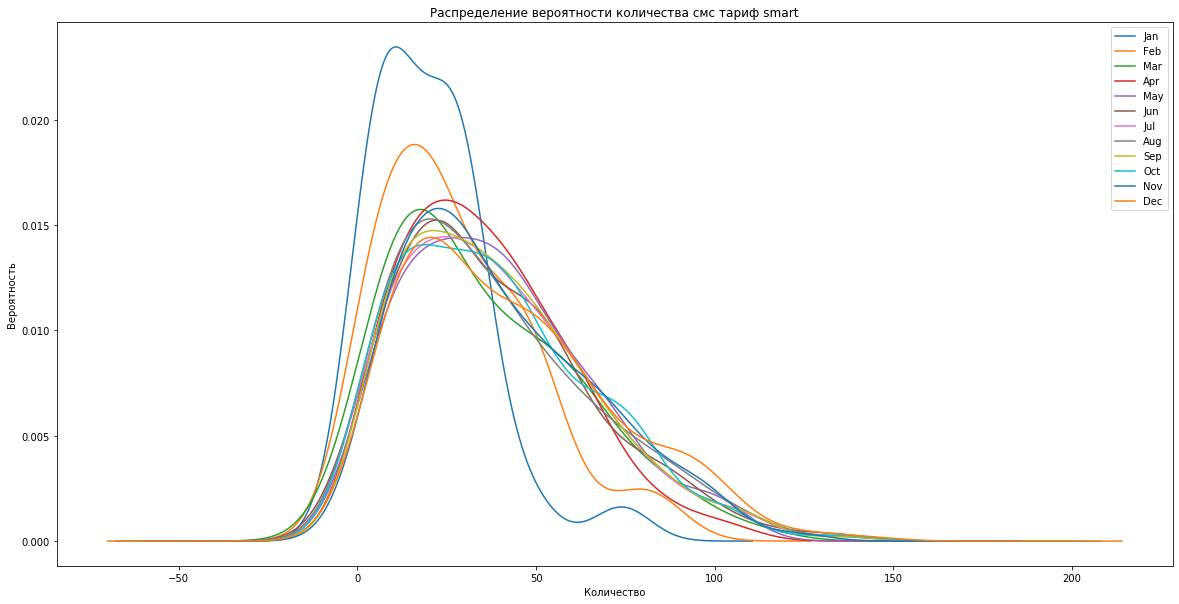

,sigma,sr,median,mon,disp
0,15.62,20.00,16.00,Jan,244.00
1,20.78,27.94,22.50,Feb,431.66
2,25.69,35.55,29.00,Mar,660.07
3,22.64,35.86,32.50,Apr,512.47
4,25.17,39.03,37.00,May,633.54
5,26.95,38.58,33.00,Jun,726.48
6,26.74,38.99,35.00,Jul,715.22
7,27.63,38.75,33.50,Aug,763.45
8,26.45,39.22,34.00,Sep,699.36
9,27.09,39.08,35.00,Oct,733.60


In [20]:
testdf=dfMess.merge(dfUser.loc[:,['user_id','tariff','city']],left_on='user_id',right_on='user_id',how='inner')

df_call_smart=testdf[testdf.tariff=='smart'].groupby(['user_id', "call_month"]).id.count().reset_index(level=1)
df_call_ultra=testdf[testdf.tariff=='ultra'].groupby(['user_id', "call_month"]).id.count().reset_index(level=1)

fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
df_disp=pd.DataFrame(columns={'mon','disp','sigma','sr','median'})
for i in range(1,13):
    df_call_smart[df_call_smart.call_month==i]['id'].plot(kind='density',label=calendar.month_abbr[i])
    disp=np.var(df_call_smart[df_call_smart.call_month==i]['id'])
    sigma=np.std(df_call_smart[df_call_smart.call_month==i]['id'])
    sr= df_call_smart[df_call_smart.call_month==i]['id'].mean()
    med= df_call_smart[df_call_smart.call_month==i]['id'].median()
    df_disp=df_disp.append({'mon': calendar.month_abbr[i] , 'disp': disp ,'sigma': sigma,'sr':sr,'median':med},ignore_index=True)
ax.legend()
plt.title('Распределение вероятности количества смс тариф smart')
plt.xlabel('Количество')
plt.ylabel('Вероятность')
plt.show()
display(df_disp)



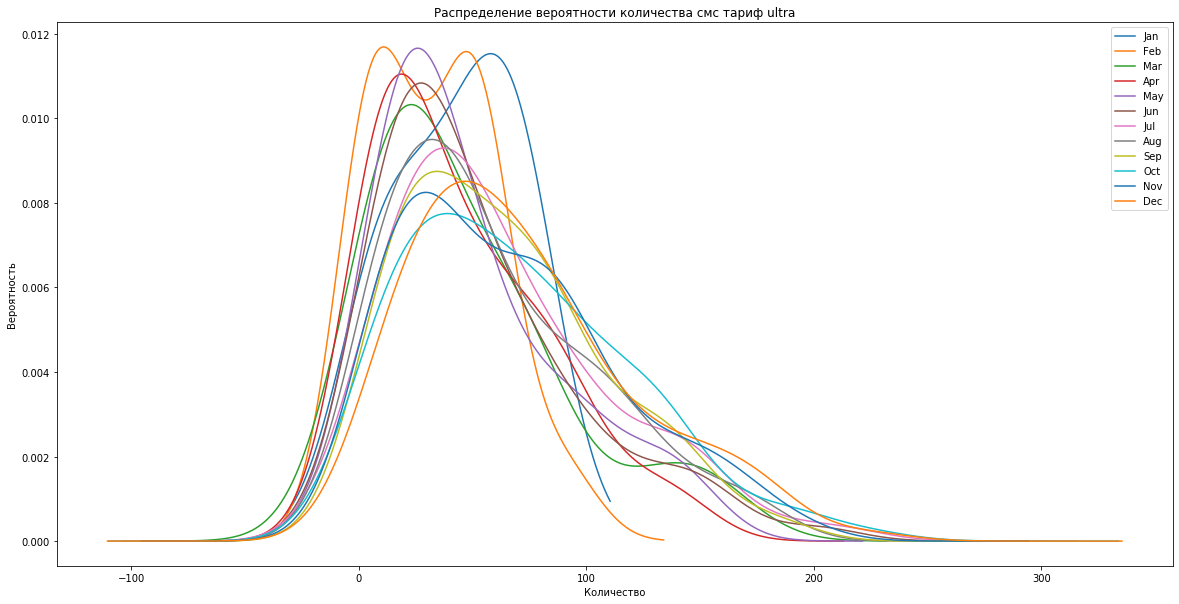

,sigma,sr,median,mon,disp
0,25.61,43.43,50.00,Jan,655.96
1,25.86,32.94,35.50,Feb,668.81
2,41.88,47.80,27.00,Mar,1753.60
3,37.04,44.51,34.00,Apr,1372.15
4,39.11,48.77,34.00,May,1529.56
5,43.67,52.31,39.00,Jun,1906.78
6,46.48,62.14,51.00,Jul,2160.72
7,44.72,58.90,47.50,Aug,1999.98
8,43.44,63.29,56.00,Sep,1886.69
9,49.02,69.78,61.00,Oct,2403.05


In [21]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
df_disp=pd.DataFrame(columns={'mon','disp','sigma','sr','median'})
for i in range(1,13):
    df_call_ultra[df_call_ultra.call_month==i]['id'].plot(kind='density',label=calendar.month_abbr[i])
    disp=np.var(df_call_ultra[df_call_ultra.call_month==i]['id'])
    sigma=np.std(df_call_ultra[df_call_ultra.call_month==i]['id'])
    sr= df_call_ultra[df_call_ultra.call_month==i]['id'].mean()
    med= df_call_ultra[df_call_ultra.call_month==i]['id'].median()
    df_disp=df_disp.append({'mon': calendar.month_abbr[i] , 'disp': disp ,'sigma': sigma,'sr':sr,'median':med},ignore_index=True)
ax.legend()
plt.title('Распределение вероятности количества смс тариф ultra')
plt.xlabel('Количество')
plt.ylabel('Вероятность')
plt.show()
display(df_disp)

#### интернет

<span style='color:blue '> 
    Теперь посмотрим как распределенно потребление интернет траффика
     </span>


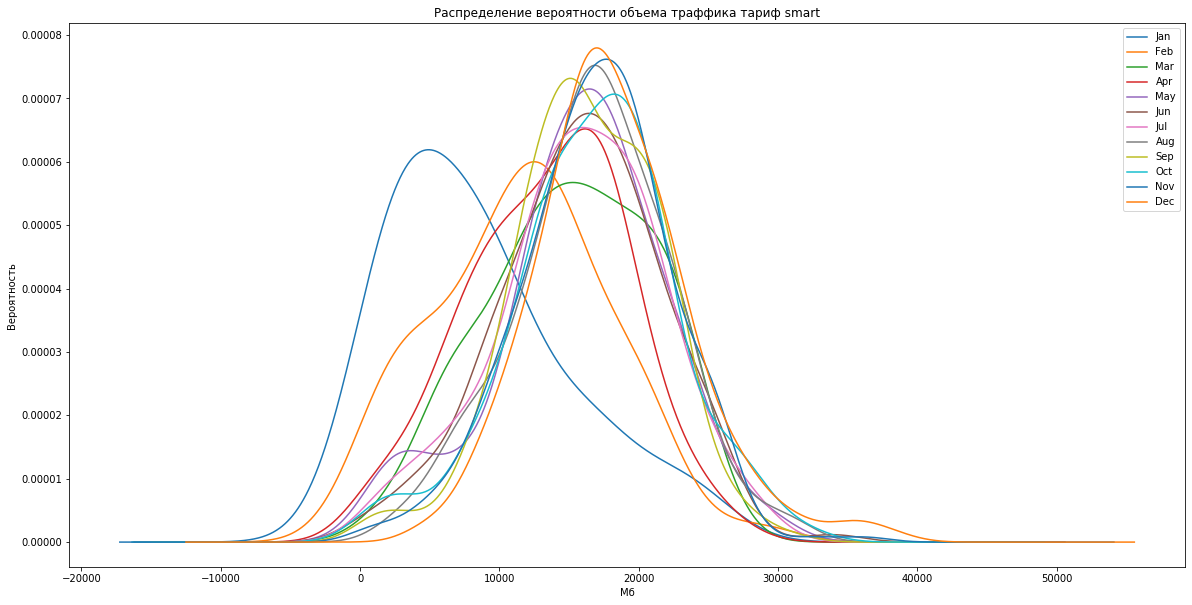

,sigma,sr,median,mon,disp
0,6.20,8513.72,7096.19,Jan,39367.51
1,6.05,11597.05,12553.71,Feb,37457.53
2,5.65,15104.16,15670.25,Mar,32741.41
3,5.54,13462.18,14087.65,Apr,31425.91
4,5.82,15805.18,16323.94,May,34654.09
5,5.64,15794.65,16077.44,Jun,32551.74
6,5.74,15743.15,15925.29,Jul,33792.40
7,5.36,16681.71,16834.71,Aug,29397.52
8,5.06,16303.58,16028.43,Sep,26265.40
9,5.71,16757.12,17225.33,Oct,33413.68


In [22]:
testdf=dfInter.merge(dfUser.loc[:,['user_id','tariff','city']],left_on='user_id',right_on='user_id',how='inner')

df_call_smart=testdf[testdf.tariff=='smart'].groupby(['user_id', "call_month"]).mb_used.sum().reset_index(level=1)
df_call_ultra=testdf[testdf.tariff=='ultra'].groupby(['user_id', "call_month"]).mb_used.sum().reset_index(level=1)

fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
df_disp=pd.DataFrame(columns={'mon','disp','sigma','sr','median'})
for i in range(1,13):
    df_call_smart[df_call_smart.call_month==i]['mb_used'].plot(kind='density',label=calendar.month_abbr[i])
    disp=np.var(df_call_smart[df_call_smart.call_month==i]['mb_used'])
    sigma=np.std(df_call_smart[df_call_smart.call_month==i]['mb_used'])
    sr= df_call_smart[df_call_smart.call_month==i]['mb_used'].mean()
    med= df_call_smart[df_call_smart.call_month==i]['mb_used'].median()
    df_disp=df_disp.append({'mon': calendar.month_abbr[i] , 'disp': disp/1024 ,'sigma': sigma/1024,'sr':sr,'median':med},ignore_index=True)  
ax.legend()
plt.title('Распределение вероятности объема траффика тариф smart')
plt.xlabel('Мб')
plt.ylabel('Вероятность')
plt.show()
display(df_disp)



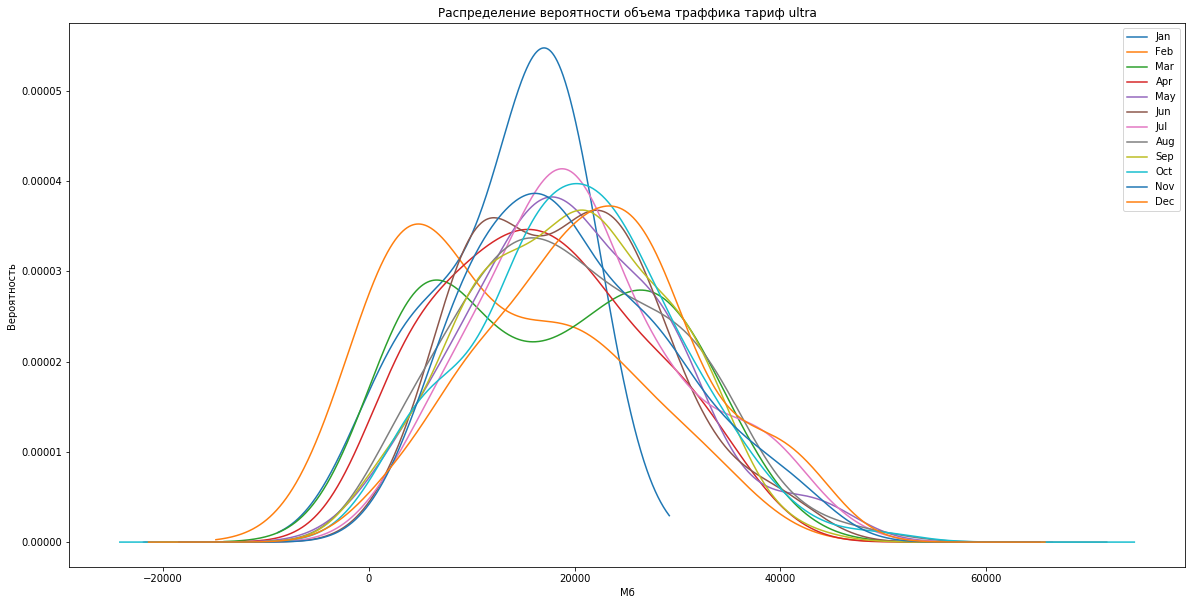

,sigma,sr,median,mon,disp
0,6.32,13140.68,14791.37,Jan,40914.05
1,9.99,12846.48,9654.83,Feb,102252.11
2,10.55,17535.55,17495.18,Mar,113964.79
3,9.40,16828.13,16645.78,Apr,90561.37
4,9.53,19656.53,18914.02,May,92927.22
5,8.84,19152.95,19660.38,Jun,80068.83
6,9.60,20723.39,20016.49,Jul,94325.06
7,10.06,19760.73,19010.64,Aug,103621.90
8,9.09,19372.74,19951.26,Sep,84689.81
9,9.41,20209.64,20355.26,Oct,90605.89


In [23]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
df_disp=pd.DataFrame(columns={'mon','disp','sigma','sr','median'})
for i in range(1,13):
    df_call_ultra[df_call_ultra.call_month==i]['mb_used'].plot(kind='density',label=calendar.month_abbr[i])
    disp=np.var(df_call_ultra[df_call_ultra.call_month==i]['mb_used'])
    sigma=np.std(df_call_ultra[df_call_ultra.call_month==i]['mb_used'])
    sr= df_call_ultra[df_call_ultra.call_month==i]['mb_used'].mean()
    med= df_call_ultra[df_call_ultra.call_month==i]['mb_used'].median()
    df_disp=df_disp.append({'mon': calendar.month_abbr[i] , 'disp': disp/1024 ,'sigma': sigma/1024,'sr':sr,'median':med},ignore_index=True)    
ax.legend()
plt.title('Распределение вероятности объема траффика тариф ultra')
plt.xlabel('Мб')
plt.ylabel('Вероятность')
plt.show()
display(df_disp)

#### выручка


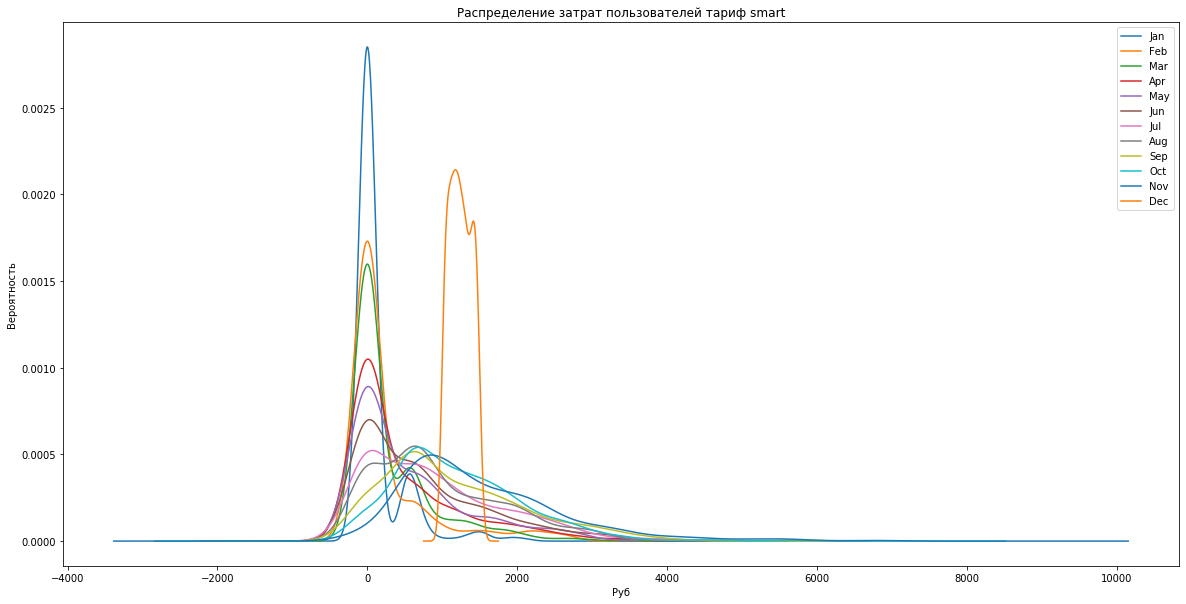

,sigma,sr,median,mon,disp
0,376.77,136.75,0.00,Jan,141954.02
1,581.18,255.49,0.00,Feb,337771.69
2,549.03,307.31,0.00,Mar,301432.95
3,743.73,481.05,0.00,Apr,553134.11
4,786.84,562.56,0.00,May,619116.43
5,823.01,700.89,550.00,Jun,677340.93
6,896.82,884.16,574.00,Jul,804292.15
7,834.30,925.89,706.00,Aug,696060.74
8,919.94,1143.21,950.00,Sep,846285.02
9,854.50,1209.13,1069.00,Oct,730172.29


In [24]:

testdf=df_user_profit.merge(dfUser.loc[:,['user_id','tariff']],left_index=True,right_on='user_id',how='inner')
df_call_smart=testdf[testdf.tariff=='smart']
df_call_ultra=testdf[testdf.tariff=='ultra']

fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
df_disp=pd.DataFrame(columns={'mon','disp','sigma','sr','median'})
for i in range(1,13):
    df_call_smart.iloc[:,i].plot(kind='density',label=calendar.month_abbr[i])
    disp=np.var(df_call_smart.iloc[:,i])
    sigma=np.std(df_call_smart.iloc[:,i])
    sr= df_call_smart.iloc[:,i].mean()
    med= df_call_smart.iloc[:,i].median()
    df_disp=df_disp.append({'mon': calendar.month_abbr[i] , 'disp': disp ,'sigma': sigma,'sr':sr,'median':med},ignore_index=True)    
ax.legend()
plt.title('Распределение затрат пользователей тариф smart')
plt.xlabel('Руб')
plt.ylabel('Вероятность')
plt.show()
display(df_disp)




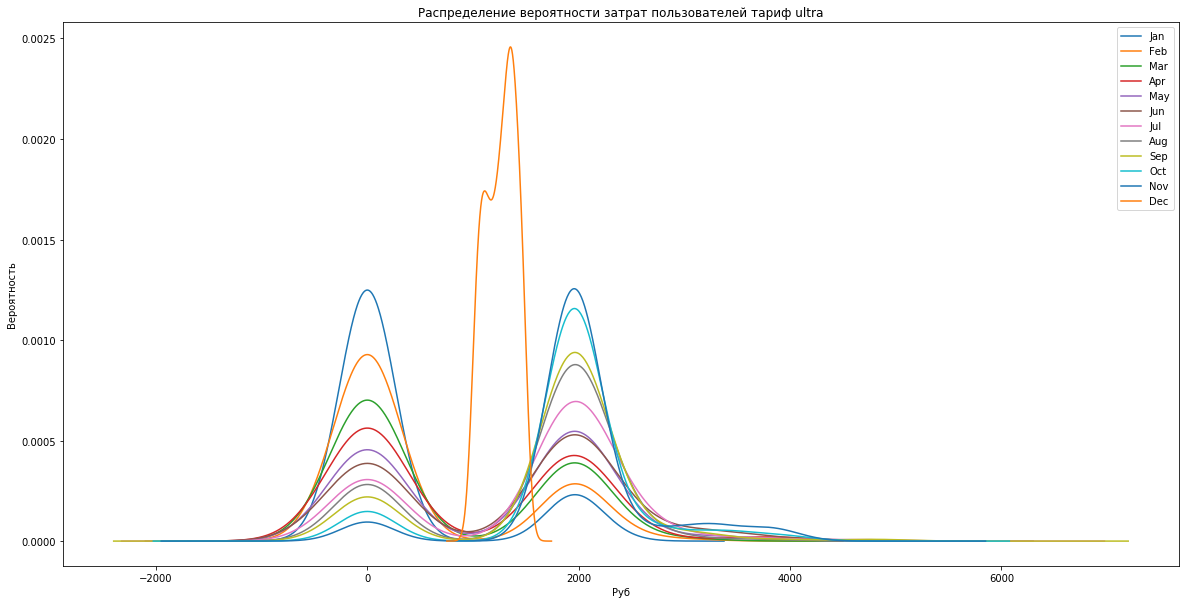

,sigma,sr,median,mon,disp
0,726.77,318.12,0.00,Jan,528195.13
1,876.47,500.34,0.00,Feb,768204.59
2,973.21,738.93,0.00,Mar,947142.47
3,1059.20,926.17,0.00,Apr,1121898.79
4,1038.45,1149.66,1950.00,May,1078372.37
5,1089.38,1293.62,1950.00,Jun,1186754.65
6,996.04,1495.97,1950.00,Jul,992097.88
7,876.56,1562.42,1950.00,Aug,768352.55
8,858.67,1705.37,1950.00,Sep,737320.17
9,738.84,1881.54,1950.00,Oct,545884.19


In [25]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
df_disp=pd.DataFrame(columns={'mon','disp','sigma','sr','median'})
for i in range(1,13):
    df_call_ultra.iloc[:,i].plot(kind='density',label=calendar.month_abbr[i])
    disp=np.var(df_call_ultra.iloc[:,i])
    sigma=np.std(df_call_ultra.iloc[:,i])
    sr= df_call_ultra.iloc[:,i].mean()
    med= df_call_ultra.iloc[:,i].median()
    df_disp=df_disp.append({'mon': calendar.month_abbr[i] , 'disp': disp ,'sigma': sigma,'sr':sr,'median':med},ignore_index=True)    
ax.legend()
plt.title('Распределение вероятности затрат пользователей тариф ultra')
plt.xlabel('Руб')
plt.ylabel('Вероятность')
plt.show()

display(df_disp)

### распределение вероятностей в целом

Статистика для продолжительности звонков
Тариф smart дисперсия 35844.19  стд.откл 189.33  сред.арифм 419.06
Тариф ultra дисперсия 94203.42  стд.откл 306.93  сред.арифм 545.45
 


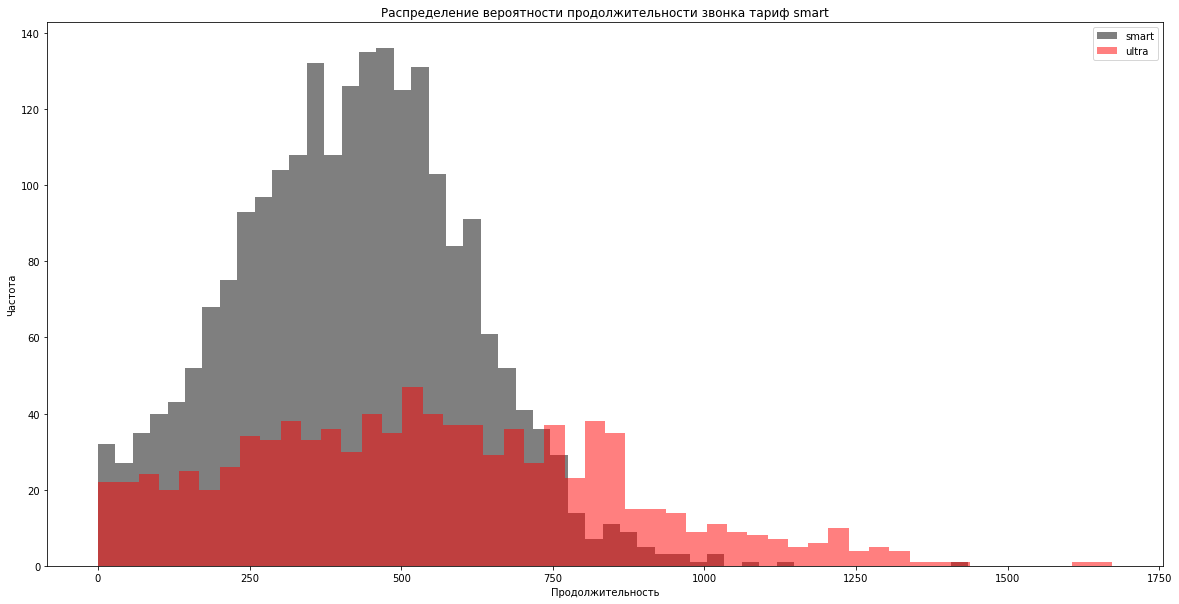

In [39]:
df_user_minut_2 = dfCalls.pivot_table(index=['user_id'],columns='call_month',values='round_time',aggfunc='sum')
df_user_minut_2 = df_user_minut_2.join(dfUser.set_index('user_id')[['tariff']])

df_minut_smart = df_user_minut_2[df_user_minut_2['tariff'] == 'smart']
df_minut_smart.drop('tariff', inplace=True, axis=1)

df_minut_ultra = df_user_minut_2[df_user_minut_2['tariff'] == 'ultra']
df_minut_ultra.drop('tariff', inplace=True, axis=1)

smart_array = [i for i in np.array(df_minut_smart).flatten() if np.isnan(i)!=True]
ultra_array = [i for i in np.array(df_minut_ultra).flatten() if np.isnan(i)!=True]

disp_s=np.var(smart_array,ddof=1)
sigma_s=np.std(smart_array,ddof=1)
sr_s= np.array(smart_array).mean()
disp_u=np.var(ultra_array,ddof=1)
sigma_u=np.std(ultra_array,ddof=1)
sr_u= np.array(ultra_array).mean()
print('Статистика для продолжительности звонков')
print('Тариф smart дисперсия {:.2F}  стд.откл {:.2F}  сред.арифм {:.2F}'.format(disp_s,sigma_s,sr_s))
print('Тариф ultra дисперсия {:.2F}  стд.откл {:.2F}  сред.арифм {:.2F}'.format(disp_u,sigma_u,sr_u))
print(' ')  

fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
ax.hist(smart_array, bins=50, label='smart', alpha=0.5, color='black')
ax.hist(ultra_array, bins=50, label='ultra', alpha=0.5, color='red')
ax.legend()
plt.title('Распределение вероятности продолжительности звонка тариф smart')
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.show()

Статистика для количества смс
Тариф smart дисперсия 717.59  стд.откл 26.79  сред.арифм 38.72
Тариф ultra дисперсия 2109.66  стд.откл 45.93  сред.арифм 61.16
 


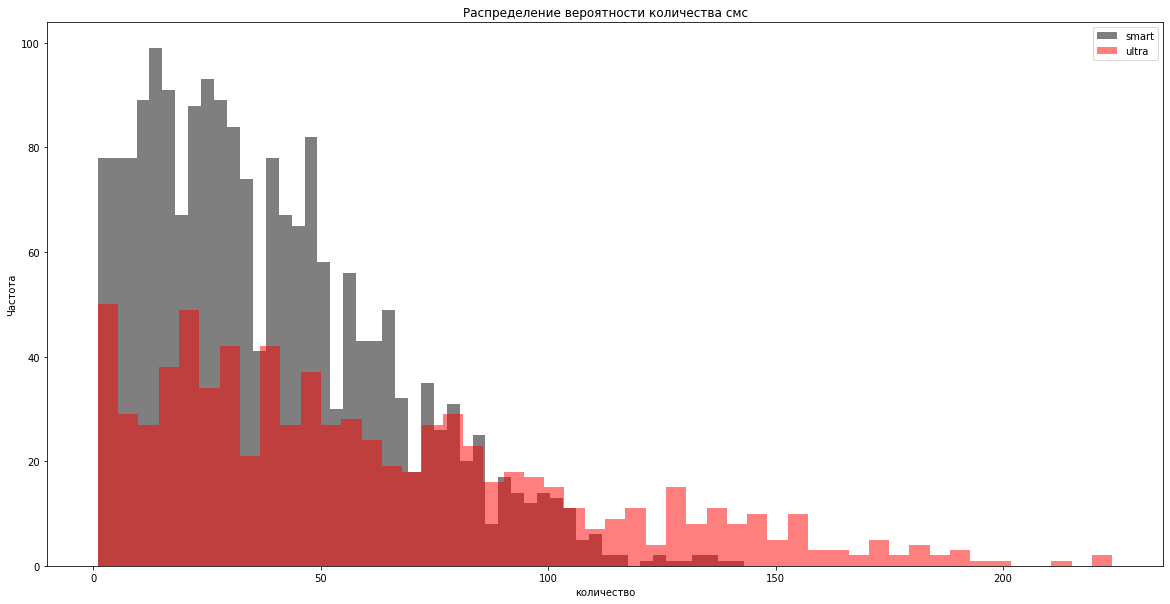

In [27]:
df_user_minut_2 = dfMess.pivot_table(index=['user_id'],columns='call_month',values='id',aggfunc='count')
df_user_minut_2 = df_user_minut_2.join(dfUser.set_index('user_id')[['tariff']])

df_minut_smart = df_user_minut_2[df_user_minut_2['tariff'] == 'smart']
df_minut_smart.drop('tariff', inplace=True, axis=1)

df_minut_ultra = df_user_minut_2[df_user_minut_2['tariff'] == 'ultra']
df_minut_ultra.drop('tariff', inplace=True, axis=1)

smart_array = [i for i in np.array(df_minut_smart).flatten() if np.isnan(i)!=True]
ultra_array = [i for i in np.array(df_minut_ultra).flatten() if np.isnan(i)!=True]

disp_s=np.var(smart_array,ddof=1)
sigma_s=np.std(smart_array,ddof=1)
sr_s= np.array(smart_array).mean()
disp_u=np.var(ultra_array,ddof=1)
sigma_u=np.std(ultra_array,ddof=1)
sr_u= np.array(ultra_array).mean()
print('Статистика для количества смс')
print('Тариф smart дисперсия {:.2F}  стд.откл {:.2F}  сред.арифм {:.2F}'.format(disp_s,sigma_s,sr_s))
print('Тариф ultra дисперсия {:.2F}  стд.откл {:.2F}  сред.арифм {:.2F}'.format(disp_u,sigma_u,sr_u))
print(' ')  

fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
ax.hist(smart_array, bins=50, label='smart', alpha=0.5, color='black')
ax.hist(ultra_array, bins=50, label='ultra', alpha=0.5, color='red')
ax.legend()
plt.title('Распределение вероятности количества смс')
plt.xlabel('количество')
plt.ylabel('Частота')
plt.show()

Статистика для интернет траффика
Тариф smart дисперсия 34359951.68  стд.откл 5861.74  сред.арифм 19668.49
Тариф ultra дисперсия 98864248.95  стд.откл 9943.05  сред.арифм 19668.49
 


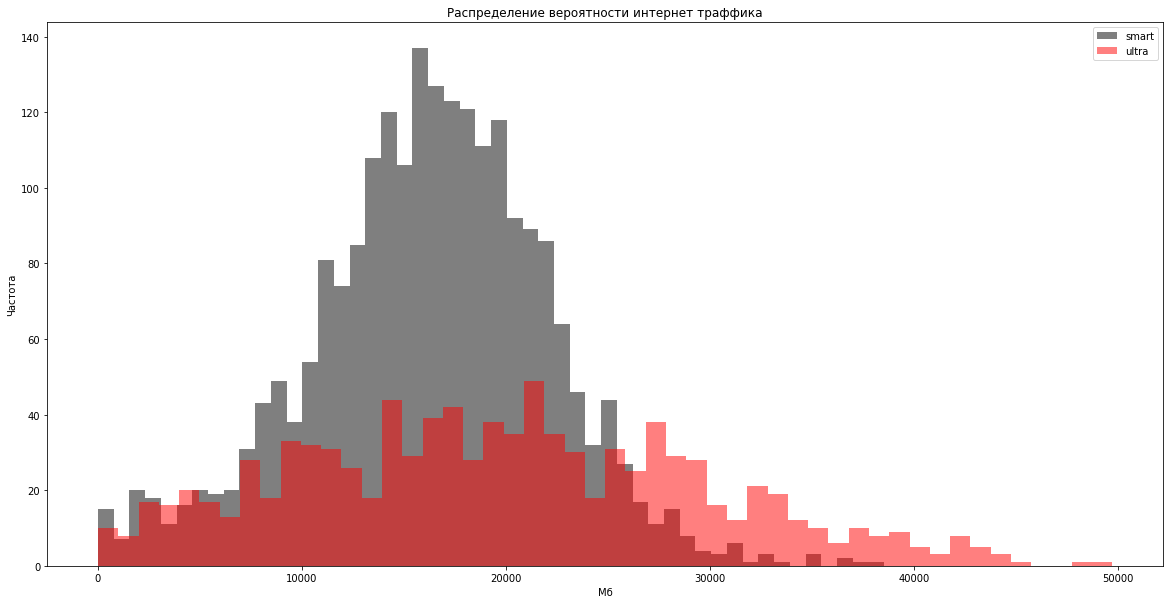

In [28]:
df_user_minut_2 = dfInter.pivot_table(index=['user_id'],columns='call_month',values='mb_used',aggfunc='sum')
df_user_minut_2 = df_user_minut_2.join(dfUser.set_index('user_id')[['tariff']])

df_minut_smart = df_user_minut_2[df_user_minut_2['tariff'] == 'smart']
df_minut_smart.drop('tariff', inplace=True, axis=1)

df_minut_ultra = df_user_minut_2[df_user_minut_2['tariff'] == 'ultra']
df_minut_ultra.drop('tariff', inplace=True, axis=1)

smart_array = [i for i in np.array(df_minut_smart).flatten() if np.isnan(i)!=True]
ultra_array = [i for i in np.array(df_minut_ultra).flatten() if np.isnan(i)!=True]

disp_s=np.var(smart_array,ddof=1)
sigma_s=np.std(smart_array,ddof=1)
sr_s= np.array(smart_array).mean()
disp_u=np.var(ultra_array,ddof=1)
sigma_u=np.std(ultra_array,ddof=1)
sr_u= np.array(ultra_array).mean()
print('Статистика для интернет траффика')
print('Тариф smart дисперсия {:.2F}  стд.откл {:.2F}  сред.арифм {:.2F}'.format(disp_s,sigma_s,sr_s))
print('Тариф ultra дисперсия {:.2F}  стд.откл {:.2F}  сред.арифм {:.2F}'.format(disp_u,sigma_u,sr_u))
print(' ')  

fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
ax.hist(smart_array, bins=50, label='smart', alpha=0.5, color='black')
ax.hist(ultra_array, bins=50, label='ultra', alpha=0.5, color='red')
ax.legend()
plt.title('Распределение вероятности интернет траффика')
plt.xlabel('Мб')
plt.ylabel('Частота')
plt.show()

<span style='color:blue '> 
    Пользователи тарифа смарт совершают более короткие звонки и пишут много смс. Максимум вероятности использования интернет траффика в районе 15гб, т.к. это значение включенного в тариф бесплетного объема.
     </span>

## Проверка гипотез

### формулировка гипотез

<span style='color:blue '> 
<div>
Вопрос 1.
<div> Средняя выручка тарифов smart и ultra различаются.</div>
<div> Нулевая гипотеза: средняя выручка тарифов равна.</div>
<div> Альтернативная гипотеза: средняя выручка не равна</div>
    </div>
<div>
<div>.   
    </div>    


In [29]:
testdf=df_user_profit.merge(dfUser.loc[:,['user_id','tariff']],left_index=True,right_on='user_id',how='inner')
testdf=testdf.set_index('user_id')

df_minut_smart = testdf[testdf['tariff'] == 'smart']
df_minut_smart.drop('tariff', inplace=True, axis=1)

df_minut_ultra = testdf[testdf['tariff'] == 'ultra']
df_minut_ultra.drop('tariff', inplace=True, axis=1)

smart_array = [i for i in np.array(df_minut_smart).flatten() if i>0]
ultra_array = [i for i in np.array(df_minut_ultra).flatten() if i>0]
result=st.ttest_ind(smart_array,ultra_array)
print(result.pvalue)

8.081909555489933e-161


<span style='color:blue '> 
    Вероятность равенства среднего этих двух выборок 6 в минус 20 степени, значит нулевая гипотеза неверна и мв можем сказать, что средняя выручка не равна.
    </span>

<span style='color:blue '> 
Вопрос 2.
<div>  Средняя выручка для пользователей из Москвы и всех остальных городов различаются</div>
<div>  Нулевая гипотеза: средняя выручка для пользователей из Москвы и всех остальных пользователей равны</div>
<div>  Альтернативная гипотеза: средняя выручка для пользователей из Москвы и всех остальных пользователей не равны</div>
    </span>

In [30]:
testdf=df_user_profit.merge(dfUser.loc[:,['user_id','tariff','city']],left_index=True,right_on='user_id',how='inner')
testdf=testdf.set_index('user_id')
df_minut_smart = testdf[(testdf.tariff=='smart') & (testdf.city!='Москва')]
df_minut_smartM = testdf[(testdf.tariff=='smart') & (testdf.city=='Москва')]
df_minut_smart.drop({'tariff','city'}, inplace=True, axis=1)
df_minut_smartM.drop({'tariff','city'}, inplace=True, axis=1)

df_minut_ultra = testdf[(testdf.tariff=='ultra') & (testdf.city!='Москва')]
df_minut_ultraM = testdf[(testdf.tariff=='ultra') & (testdf.city=='Москва')]
df_minut_ultra.drop({'tariff','city'}, inplace=True, axis=1)
df_minut_ultraM.drop({'tariff','city'}, inplace=True, axis=1)

smart_array = [i for i in np.array(df_minut_smart).flatten() if i>0]
ultra_array = [i for i in np.array(df_minut_ultra).flatten() if i>0]
smart_arrayM = [i for i in np.array(df_minut_smartM).flatten() if i>0]
ultra_arrayM = [i for i in np.array(df_minut_ultraM).flatten() if i>0]


res1=st.ttest_ind(smart_array,smart_arrayM)
res2=st.ttest_ind(ultra_array,ultra_arrayM)

print('Для тарифа smart {}'.format(res1.pvalue))
print('Для тарифа ultra {}'.format(res2.pvalue))

Для тарифа smart 0.18439170052928663
Для тарифа ultra 0.8570628563121834


<span style='color:blue '> 
    Вероятность равенства среднего этих двух выборок для тарифа smart 18%, а для тарифа ultra больше 85%. Значит нулевая гипотеза верна и мы можем сказать, что средняя выручка обоих тарифов для Москвы и других регионов равны.
    </span>

In [31]:
#     А сколько денег вообще, за год принесли эти тарифы?
df1=df_user_minut.add(df_user_mess,fill_value=0)
df1=df1.add(df_user_inter,fill_value=0)
df1=df1.add(df_monfee,fill_value=0)

testdf=df1.merge(dfUser.loc[:,['user_id','tariff','city']],left_index=True,right_on='user_id',how='inner')
def sum_row(row):
    sm=0
    for i in range (1,13):
        sm=sm+row[i]
    row.itog=sm
    return(row)
testdf['itog']=0.0
testdf=testdf.apply(sum_row,axis=1)
display(testdf.groupby(testdf.tariff)['itog'].sum())


tariff
smart   2875901.00
ultra   2041050.00
Name: itog, dtype: float64

### вывод

В результате анализа даных мы можем отметить следующие моменты:
 1. средняя продолжительность звонка на обоих тарифах составила около 8 минут
 2. среднее количество смс в месяц для тарифа смарт 38 для тарифа ультра 50
 3. средний интернет трафик для тарифа смарт 15Гб для тарифа ультра 20Гб
 4. 213 пользователей тарифа смарт превысили включенное в тариф время разговоров
 5. 215 пользователей тарифа смарт превысили включенное в тариф количество смс
 6. 310 пользователей тарифа смарт и 43 пользователя тарифа ультра превысили включенное в тариф количество интернет трафика
 7. проверенна гипотеза о равенстве трат пользователей на тарифах смарт и ультра
 8. проверенна гипотеза о равенстве трат пользователей из Москвы и других регионов
 9. количество данных по месяцам не равно и нарастает от 1 до 12. Видимо по мере перехода пользователей на эти тарифы.
 
Выводы:
 1. Средняя выручка с пользователей смарт и ультра не совпадает
 2. Средняя выручка с пользователей смарт и ультра Москвы и других регионов совпадает
 3. пользователи тарифа смарт чаще превышают включенные в тариф лимиты
 4. пользователи тарифа смарт приносят больше денег
 5. на помесячном графике распределения затрат для тарифа смарт выделяется в большую сторону декабрь. Видимо предновогодний ажиотаж.
 6. на помесячном графике распределения затрат для тарифа для тарифа ультра четко видны два пика: около 0 - те кто уложился в лимиты, и около 2000 - те кто не уложился. Вожможно первым можно перейти на тариф смарт.
 
 Таким образом, судя по выручке, для компании безусловно более выгоден тариф смарт. Но для принятия решения нужно знать, несет ли компания какие-либо операционные расходы от объема звонков, смс и траффика, т.к. пользователи тарифа смарт совершают больше звонков и пишут больше смс. 
